In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy.spatial.distance import *
from scipy.cluster.hierarchy import dendrogram, linkage , set_link_color_palette
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('PesquisaBinaria.csv',header=0,index_col=0)

In [5]:
#Assurence that there is no missing values on the dateset
for col in df.columns.values: 
    assert not df[col].isnull().values.any()

In [40]:
df.head(3)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q42,q43,q44,q45,q46,q47,q48,q49,q50,setor
1,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,1,1,0,...,1,0,1,1,1,0,1,0,1,2
3,0,1,0,1,0,1,0,1,1,0,...,1,0,1,0,0,0,1,0,1,2


In [6]:
header_row = df.columns.values

In [7]:
for col in header_row:
    print(col)
    print(df[col].value_counts().sort_index())

q1
0    25
1    10
Name: q1, dtype: int64
q2
0    20
1    15
Name: q2, dtype: int64
q3
0    26
1     9
Name: q3, dtype: int64
q4
0    22
1    13
Name: q4, dtype: int64
q5
0    24
1    11
Name: q5, dtype: int64
q6
0    18
1    17
Name: q6, dtype: int64
q7
0    22
1    13
Name: q7, dtype: int64
q8
0    25
1    10
Name: q8, dtype: int64
q9
0    19
1    16
Name: q9, dtype: int64
q10
0    20
1    15
Name: q10, dtype: int64
q11
0    25
1    10
Name: q11, dtype: int64
q12
0    23
1    12
Name: q12, dtype: int64
q13
0    15
1    20
Name: q13, dtype: int64
q14
0    19
1    16
Name: q14, dtype: int64
q15
0    23
1    12
Name: q15, dtype: int64
q16
0    14
1    21
Name: q16, dtype: int64
q17
0    29
1     6
Name: q17, dtype: int64
q18
0    16
1    19
Name: q18, dtype: int64
q19
0    26
1     9
Name: q19, dtype: int64
q20
0    21
1    14
Name: q20, dtype: int64
q21
0    30
1     5
Name: q21, dtype: int64
q22
0    26
1     9
Name: q22, dtype: int64
q23
0    25
1    10
Name: q23, dtype: int64
q24
0 

In [8]:
#removing the setor column
df_clean = df.drop(columns=['setor'])

In [71]:
# calculating sokal & michener dissimilarity using python 
D = cdist(df_clean, df_clean, 'sokalmichener')

In [72]:
SIM_M = pd.DataFrame(D)
SIM_M

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.795181,0.717949,0.666667,0.611111,0.888889,0.684211,0.611111,0.412698,0.360656,...,0.780488,0.507463,0.666667,0.648649,0.795181,0.780488,0.666667,0.823529,0.701299,0.461538
1,0.795181,0.000000,0.360656,0.684211,0.734177,0.412698,0.666667,0.734177,0.611111,0.648649,...,0.461538,0.484848,0.684211,0.701299,0.333333,0.412698,0.717949,0.333333,0.717949,0.648649
2,0.717949,0.360656,0.000000,0.591549,0.648649,0.437500,0.529412,0.648649,0.550725,0.630137,...,0.387097,0.507463,0.591549,0.611111,0.305085,0.333333,0.550725,0.360656,0.591549,0.630137
3,0.666667,0.684211,0.591549,0.000000,0.305085,0.630137,0.507463,0.360656,0.648649,0.750000,...,0.666667,0.717949,0.484848,0.412698,0.717949,0.630137,0.387097,0.717949,0.484848,0.648649
4,0.611111,0.734177,0.648649,0.305085,0.000000,0.648649,0.529412,0.437500,0.666667,0.734177,...,0.717949,0.734177,0.412698,0.437500,0.734177,0.648649,0.461538,0.734177,0.550725,0.630137
5,0.888889,0.412698,0.437500,0.630137,0.648649,0.000000,0.571429,0.684211,0.734177,0.823529,...,0.437500,0.701299,0.630137,0.684211,0.305085,0.387097,0.630137,0.305085,0.630137,0.734177
6,0.684211,0.666667,0.529412,0.507463,0.529412,0.571429,0.000000,0.484848,0.734177,0.734177,...,0.611111,0.701299,0.412698,0.484848,0.591549,0.571429,0.360656,0.630137,0.412698,0.630137
7,0.611111,0.734177,0.648649,0.360656,0.437500,0.684211,0.484848,0.000000,0.666667,0.666667,...,0.648649,0.734177,0.461538,0.437500,0.701299,0.684211,0.412698,0.701299,0.507463,0.630137
8,0.412698,0.611111,0.550725,0.648649,0.666667,0.734177,0.734177,0.666667,0.000000,0.387097,...,0.630137,0.333333,0.750000,0.666667,0.611111,0.630137,0.684211,0.648649,0.717949,0.484848
9,0.360656,0.648649,0.630137,0.750000,0.734177,0.823529,0.734177,0.666667,0.387097,0.000000,...,0.666667,0.387097,0.717949,0.701299,0.684211,0.701299,0.717949,0.684211,0.750000,0.484848


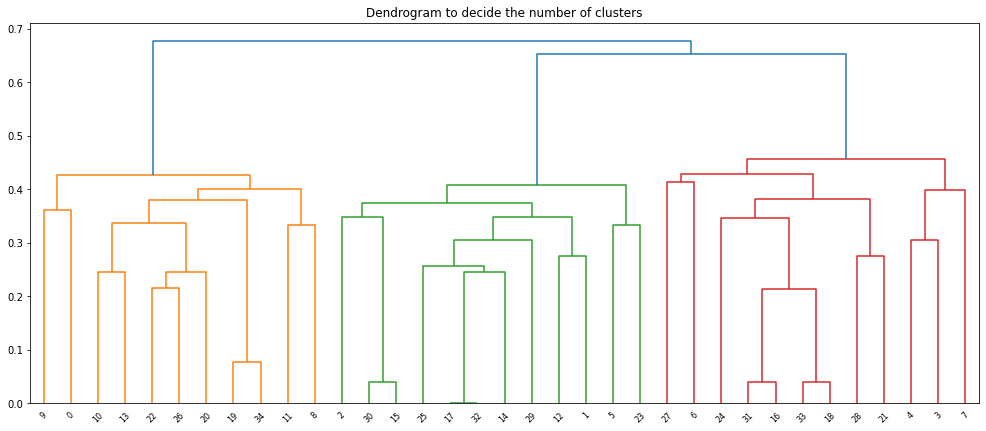

In [75]:
plt.figure(figsize=(17, 7))  
plt.title("Dendrogram to decide the number of clusters")  
dend = dendrogram(linkage(df_clean, method='average',metric='sokalmichener',optimal_ordering=True))

In [78]:
cluster_H = AgglomerativeClustering(affinity='sokalmichener',linkage='average',compute_distances=True,n_clusters=3)
df_clean['cluster_H'] = cluster_H.fit_predict(df_clean)

In [83]:
cluster_H.distances_

array([0.        , 0.03846154, 0.03846154, 0.03846154, 0.0754717 ,
       0.21025084, 0.21052632, 0.24137931, 0.24137931, 0.24137931,
       0.25131502, 0.27118644, 0.27118644, 0.2993029 , 0.3       ,
       0.32786885, 0.32786885, 0.33190671, 0.33959721, 0.34135378,
       0.34261649, 0.35483871, 0.36792054, 0.37323319, 0.37507254,
       0.39280397, 0.39392863, 0.40125543, 0.40625   , 0.41966042,
       0.4207777 , 0.44967627, 0.65364712, 0.68004044])

In [79]:
df['cluster_H'] = df_clean['cluster_H']

In [80]:
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q43,q44,q45,q46,q47,q48,q49,q50,setor,cluster_H
1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,1
2,0,1,0,0,0,0,0,1,1,0,...,0,1,1,1,0,1,0,1,2,2
3,0,1,0,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,1,2,2
4,1,0,1,1,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,3,0
5,1,0,0,1,1,1,0,0,1,1,...,0,1,0,1,0,1,0,1,3,0


In [88]:
df[['setor','cluster_H']]

,setor,cluster_H
1,1,1
2,2,2
3,2,2
4,3,0
5,3,0
6,2,2
7,3,0
8,3,0
9,1,1
10,1,1
